In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Membaca file CSV
df = pd.read_csv('dataTrain.csv')
print(df)


        id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1        1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2        1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3        1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4        1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...      sd15  sd16      sd17  sd18  sd19      sd20  \
0      14

In [2]:
# Menghapus kolom yang tidak diperlukan
df.drop(['cycle', 'label_bnc', 'label_mcc'], axis=1, inplace=True)


In [3]:
# Menghapus kolom 'ttf' dari fitur, tapi menyimpannya sebagai target
target = df['ttf']
df.drop(['ttf'], axis=1, inplace=True)
print(target)


0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: ttf, Length: 20631, dtype: int64


In [4]:
# Normalisasi data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized)


        id  setting1  setting2  setting3   s1        s2        s3        s4  \
0      0.0  0.459770  0.166667       0.0  0.0  0.183735  0.406802  0.309757   
1      0.0  0.609195  0.250000       0.0  0.0  0.283133  0.453019  0.352633   
2      0.0  0.252874  0.750000       0.0  0.0  0.343373  0.369523  0.370527   
3      0.0  0.540230  0.500000       0.0  0.0  0.343373  0.256159  0.331195   
4      0.0  0.390805  0.333333       0.0  0.0  0.349398  0.257467  0.404625   
...    ...       ...       ...       ...  ...       ...       ...       ...   
20626  1.0  0.477011  0.250000       0.0  0.0  0.686747  0.587312  0.782917   
20627  1.0  0.408046  0.083333       0.0  0.0  0.701807  0.729453  0.866475   
20628  1.0  0.522989  0.500000       0.0  0.0  0.665663  0.684979  0.775321   
20629  1.0  0.436782  0.750000       0.0  0.0  0.608434  0.746021  0.747468   
20630  1.0  0.316092  0.083333       0.0  0.0  0.795181  0.639634  0.842167   

        s5   s6  ...      sd12      sd13      sd14 

In [5]:
# Menyimpan data yang sudah dinormalisasi ke file CSV
df_normalized.to_csv('data_normalized.csv', index=False)
target.to_csv('target.csv', index=False)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Membaca data yang telah dinormalisasi
df_normalized = pd.read_csv('data_normalized.csv')
target = pd.read_csv('target.csv')
print(target)

       ttf
0      191
1      190
2      189
3      188
4      187
...    ...
20626    4
20627    3
20628    2
20629    1
20630    0

[20631 rows x 1 columns]


In [7]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df_normalized, target, test_size=0.2, random_state=42)


In [8]:
# Membuat dan melatih model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())


RandomForestRegressor(random_state=42)

In [9]:
# Memprediksi menggunakan set pengujian
y_pred = model.predict(X_test)
print(y_pred)


[133.34   6.76 193.93 ... 121.75 111.41 195.5 ]


In [10]:
# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 392.90834439059853


In [11]:
# Menyimpan model
joblib.dump(model, 'rul_predictor_model.pkl')


['rul_predictor_model.pkl']

In [12]:
# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [13]:
# Menyimpan data set pelatihan dan pengujian ke file CSV
train_data = pd.concat([X_train, y_train], axis=1)
print(train_data)
test_data = pd.concat([X_test, y_test], axis=1)
print(train_data)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


             id  setting1  setting2  setting3   s1        s2        s3  \
6244   0.313131  0.551724  0.250000       0.0  0.0  0.388554  0.431437   
9380   0.474747  0.494253  0.500000       0.0  0.0  0.310241  0.495313   
6105   0.303030  0.321839  0.666667       0.0  0.0  0.361446  0.181164   
15825  0.787879  0.390805  0.333333       0.0  0.0  0.469880  0.252453   
19025  0.939394  0.454023  0.583333       0.0  0.0  0.445783  0.353826   
...         ...       ...       ...       ...  ...       ...       ...   
11284  0.565657  0.206897  0.583333       0.0  0.0  0.295181  0.478526   
11964  0.606061  0.712644  0.833333       0.0  0.0  0.180723  0.208197   
5390   0.262626  0.597701  0.500000       0.0  0.0  0.388554  0.651188   
860    0.040404  0.500000  0.833333       0.0  0.0  0.216867  0.152387   
15795  0.787879  0.454023  0.666667       0.0  0.0  0.289157  0.426422   

             s4   s5   s6  ...      sd13      sd14      sd15  sd16      sd17  \
6244   0.404625  0.0  1.0  ... 

In [14]:
# Menyimpan prediksi dan nilai sebenarnya untuk data pengujian
test_predictions = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred})
print(test_predictions)
test_predictions.to_csv('test_predictions.csv', index=False)

      Actual  Predicted
0        135     133.34
1          2       6.76
2        217     193.93
3          0       1.82
4        178     203.36
...      ...        ...
4122     184     181.69
4123     103     109.43
4124     121     121.75
4125     104     111.41
4126     187     195.50

[4127 rows x 2 columns]


In [15]:
# Memuat model dan scaler
model = joblib.load('rul_predictor_model.pkl')
print(model)
scaler = joblib.load('scaler.pkl')
print(scaler)


RandomForestRegressor(random_state=42)
MinMaxScaler()


In [16]:
# Membaca data baru dan melakukan praproses yang sama
new_data = pd.read_csv('data_normalized.csv')
new_data_normalized = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)



In [17]:
# Melakukan prediksi
predictions = model.predict(new_data_normalized)
print(predictions)


[118.68 104.89 106.43 ... 115.01 115.41 109.07]


In [18]:
# Mengubah prediksi menjadi bilangan bulat dan menambahkan "hari"
predictions_int = predictions.astype(int)
predictions_str = [f"{pred} hari" for pred in predictions_int]


In [19]:
# Membaca data dari data_normalized.csv
data = pd.read_csv('data_normalized.csv')

# Menampilkan beberapa baris pertama dari data
data.head()

,id,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,0.0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,...,0.488189,0.160656,0.508246,0.132258,0.0,0.000000,0.0,0.0,0.130435,0.017365
2,0.0,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,...,0.450405,0.120224,0.374753,0.116172,0.0,0.408248,0.0,0.0,0.169323,0.237961
3,0.0,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,...,0.552267,0.133773,0.307559,0.427568,0.0,0.353553,0.0,0.0,0.234642,0.202745
4,0.0,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,...,0.481694,0.117620,0.267278,0.394651,0.0,0.387298,0.0,0.0,0.226338,0.178837


In [20]:
# Menampilkan statistik deskriptif dari data
data.describe()


,id,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
count,20631.000000,20631.000000,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,0.510167,0.499490,0.501959,0.0,0.0,0.443052,0.424746,0.450435,0.0,0.980321,...,0.313751,0.129283,0.304076,0.285910,0.0,0.312956,0.0,0.0,0.290947,0.301546
std,0.295229,0.125708,0.244218,0.0,0.0,0.150618,0.133664,0.151935,0.0,0.138898,...,0.117372,0.050208,0.115317,0.108008,0.0,0.120911,0.0,0.0,0.107193,0.110346
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.252525,0.413793,0.333333,0.0,0.0,0.335843,0.331807,0.339467,0.0,1.000000,...,0.230777,0.094227,0.223734,0.208689,0.0,0.193649,0.0,0.0,0.215426,0.223292
50%,0.515152,0.500000,0.500000,0.0,0.0,0.430723,0.415522,0.435348,0.0,1.000000,...,0.306136,0.126092,0.296302,0.279266,0.0,0.295804,0.0,0.0,0.285106,0.296589
75%,0.767677,0.586207,0.750000,0.0,0.0,0.539157,0.508829,0.545324,0.0,1.000000,...,0.388054,0.160656,0.374595,0.355535,0.0,0.403113,0.0,0.0,0.360109,0.372848
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000


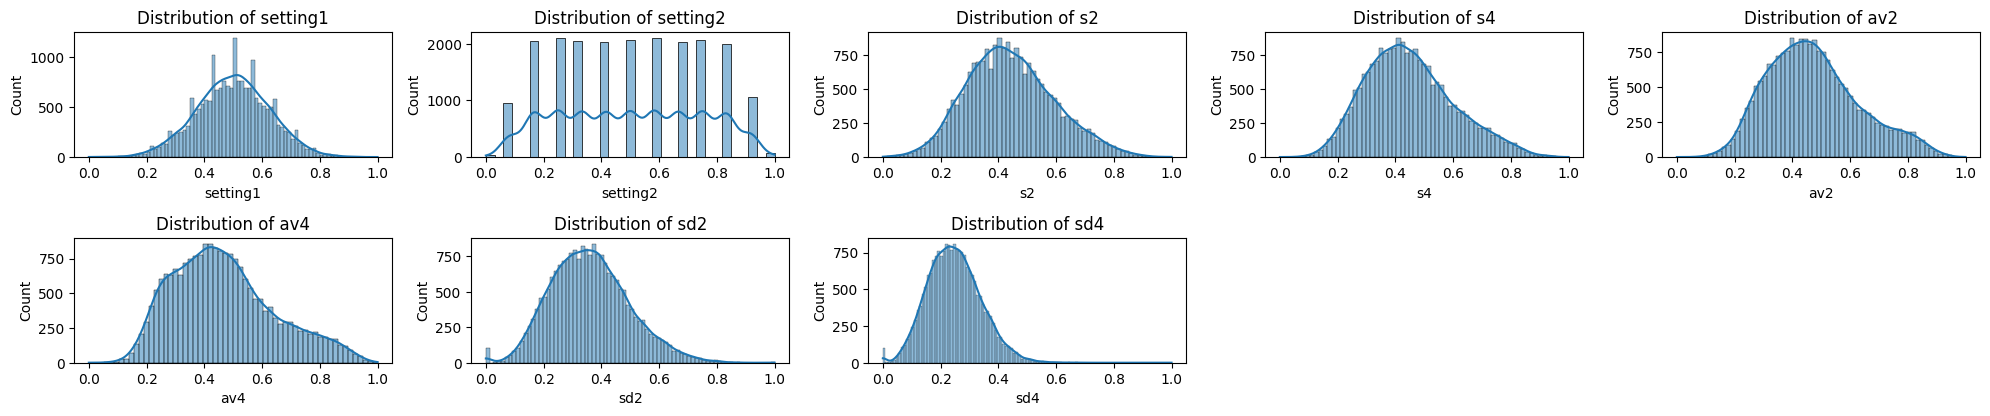

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan plot
plt.figure(figsize=(20, 10))

# Plot distribusi dari beberapa kolom
columns_to_plot = ['setting1', 'setting2','s2','s4', 'av2', 'av4', 'sd2', 'sd4']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


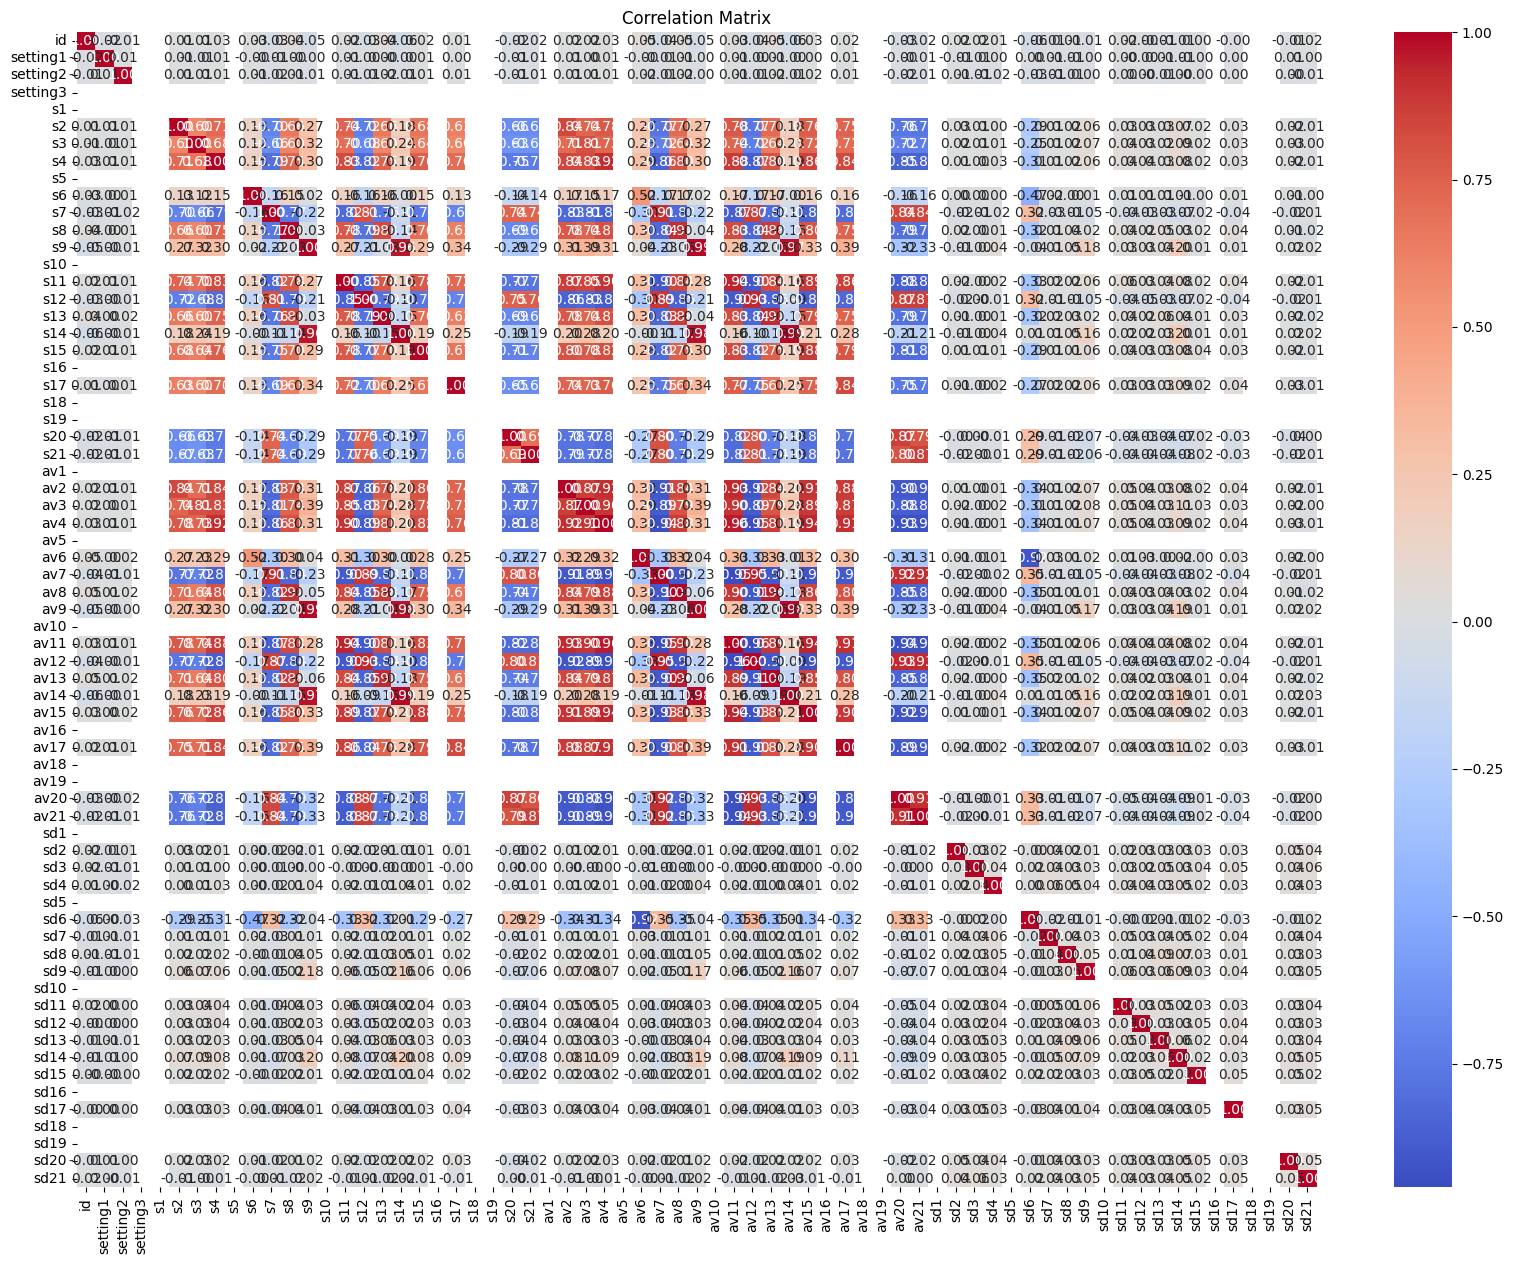

In [22]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [23]:
# Menyimpan hasil prediksi
predictions_df = pd.DataFrame(predictions_str, columns=['Predicted_RUL'])
predictions_df.to_csv('new_data_predictions.csv', index=False)

print(predictions_df)

      Predicted_RUL
0          118 hari
1          104 hari
2          106 hari
3          106 hari
4          106 hari
...             ...
20626      107 hari
20627      108 hari
20628      115 hari
20629      115 hari
20630      109 hari

[20631 rows x 1 columns]
